In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reading dataset

In [3]:
responses= pd.read_csv('data/responses.csv')

In [4]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# Defining the objective

## Target

Create an Instagram account for the Quarentine to cheer up people who are struggling with possible depression

# Features selection

In [5]:
# Original features:

In [6]:
# FILTERED BY USEFUL INFORMATION FOR THE OBJECTIVE

In [275]:
music = ['Folk', 'Country', 'Classical music', 
         'Musical', 'Pop', 'Metal or Hardrock', 'Hiphop, Rap', 'Reggae, Ska', 
         'Swing, Jazz', 'Alternative', 'Latino', 'Techno, Trance']

movies = ['Horror', 'Comedy', 'Romantic', 'Sci-fi', 'War', 
          'Fantasy/Fairy tales', 'Documentary', 'Western', 'Action']

interests = ['Psychology', 'Politics', 'Mathematics', 'Economy Management', 'Geography', 
             'Foreign languages', 'Medicine', 'Science and technology','Finances']
             
hobbies = ['Internet', 'Cars', 'Art exhibitions', 
        'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 
        'Gardening', 'Shopping', 'Fun with friends', 'Pets']

fears = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 
        'Dangerous dogs', 'Fear of public speaking']

emotions = ['Loneliness',  'Mood swings', 'Socializing', 'Loss of interest', 'Self-criticism',
        'Unpopularity', 'Life struggles', 'Happiness in life', 'Changing the past', 
        'Personality','Getting up','Interests or hobbies', 'Hypochondria']

spendings = ['Entertainment spending', 'Spending on looks', 'Spending on gadgets', 
             'Spending on healthy eating']

personal_info = ['Age', 'Gender']

not_using = ['Music', 'Movies', 'Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 
'Final judgement', 'Reliability', 'Keeping promises', 'Borrowed stuff', 
'Elections',  'Judgment calls', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals',
'Cheating in school', 'Children', "Parents' advice",'Energy levels', 'Small - big dogs',
'Questionnaires or polls', 'Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 
'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed','Education', 
'Only child', 'Village - town', 'House - block of flats', 'Responding to a serious letter',
'Charity', 'Waiting', 'New environment','Shopping centres', 'Branded clothing', 'God',
'Appearence and gestures', 'Assertiveness','Knowing the right people', 'Finding lost valuables',  
'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Village - town', 
'Passive sport', 'Active sport','Adrenaline sports','Slow songs or fast songs', 'Opera','Rock n roll',
'Rock', 'Punk','Thriller','Animated', 'Physics','Biology', 'Chemistry','Law','History', 'PC', 'Dance','Theatre', 
'Public speaking', 'Achievements', 'Getting angry', 'Number of friends', 'Dreams','Health', 'Celebrities', 'Reading', ]

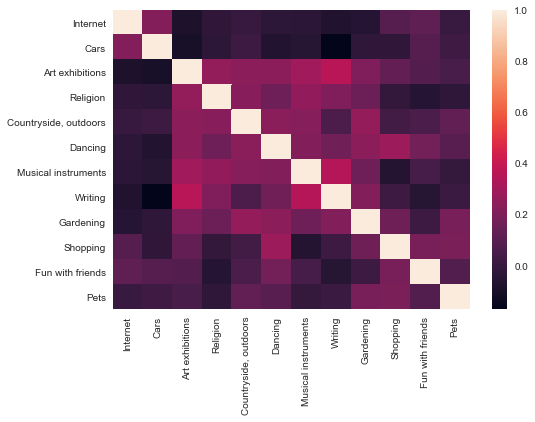

In [276]:
sns.heatmap(responses[hobbies].corr())

In [375]:
# CLUSTERIZAR

In [376]:
# FILTRAR POR INTERESSES

## Clustering by happy / sad:

In [65]:
emotional = responses[emotions]

In [66]:
emotional_no_na = emotional.dropna()

In [67]:
emotional_nan = emotional.drop(emotional_no_na.index)

In [68]:
emotional_no_na.shape, emotional_nan.shape

((967, 13), (43, 13))

In [69]:
# Filling NaN

In [70]:
emotional = emotional.fillna(3)

In [71]:
# Clustering

In [83]:
kmean = KMeans(n_clusters=2)
kmean.fit(emotional)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
kmean.inertia_

15757.700655624569

In [85]:
kmean.labels_

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [86]:
# Visualization

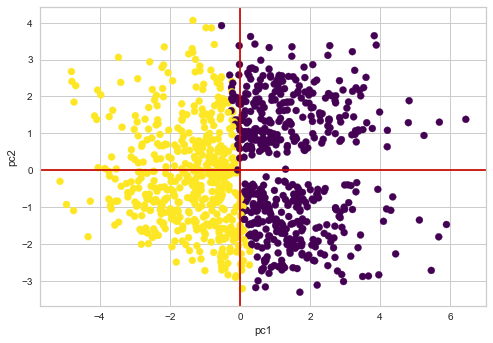

In [87]:
pca = PCA(2)
pc1 = pca.fit_transform(emotional)[:,0]
pc2 = pca.fit_transform(emotional)[:,1]
plt.scatter(x=pc1, y=pc2, c=kmean.predict(emotional), cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.axhline(c='r')
plt.axvline(c='r')

In [88]:
analysis = pd.DataFrame([pca.components_[0], pca.components_[1], emotional.columns]).T
analysis.columns = ['pc1', 'pc2', 'labels']
analysis.sort_values('pc1')

,pc1,pc2,labels
11,-0.242989,0.0853986,Interests or hobbies
7,-0.242258,-0.0199202,Happiness in life
9,-0.144185,0.0132481,Personality
2,-0.130251,0.229972,Socializing
13,0.0087089,-0.409201,emotional_group
3,0.0917708,0.772778,Loss of interest
10,0.192577,0.0670501,Getting up
5,0.219082,-0.164543,Unpopularity
12,0.220917,0.0607202,Hypochondria
4,0.285959,0.0498434,Self-criticism


In [89]:
emotional['emotional_group'] = kmean.labels_

In [90]:
emotional

,Loneliness,Mood swings,Socializing,Loss of interest,Self-criticism,Unpopularity,Life struggles,Happiness in life,Changing the past,Personality,Getting up,Interests or hobbies,Hypochondria,emotional_group
0,3.0,3.0,3.0,1.0,1.0,5.0,1.0,4.0,1.0,4.0,2.0,3.0,1.0,1
1,2.0,4.0,4.0,3.0,4.0,4.0,1.0,4.0,4.0,3.0,5.0,3.0,1.0,1
2,5.0,4.0,5.0,1.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,5.0,1.0,0
3,5.0,5.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,2.0,1.0,3.0,3.0,0
4,3.0,2.0,3.0,2.0,5.0,5.0,2.0,3.0,4.0,3.0,4.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,4.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0,1.0,3.0,5.0,4.0,1.0,1
1006,1.0,1.0,3.0,1.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,3.0,1.0,1
1007,4.0,2.0,1.0,1.0,5.0,5.0,5.0,3.0,5.0,2.0,5.0,1.0,1.0,0
1008,3.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,4.0,5.0,3.0,1.0,0


In [92]:
emotional.groupby('emotional_group').mean()

,Loneliness,Mood swings,Socializing,Loss of interest,Self-criticism,Unpopularity,Life struggles,Happiness in life,Changing the past,Personality,Getting up,Interests or hobbies,Hypochondria
emotional_group,,,,,,,,,,,,,
0,3.480237,3.723320,3.003953,2.930830,3.930830,3.693676,3.606719,3.377470,3.646245,3.126482,3.871542,3.231225,2.245059
1,2.291667,2.789683,3.311508,2.488095,3.220238,3.226190,2.454365,4.029762,2.255952,3.456349,3.305556,3.869048,1.587302


In [94]:
# GROUP '0' WAS IDENTIFIED AS THE 'DEPRESSIVE' ONE, 
## ONLY THIS GROUP WILL BE USED IN THE ANALYSIS

In [96]:
emotional.query('emotional_group == 0').index

Int64Index([   2,    3,    4,    8,    9,   10,   11,   12,   14,   15,
            ...
             986,  987,  988,  989,  992,  993,  995, 1000, 1007, 1008],
           dtype='int64', length=506)

In [99]:
## SELECTING ONLY THIS GROUP IN ORIGINAL DATA
data = responses.loc[emotional.query('emotional_group == 0').index, :]

## Choosing features that will be used

In [352]:
interests_df = data[interests + hobbies ]

In [353]:
interests_df.shape

(506, 21)

# Treating NaN

In [354]:
interests_df.isna().sum().sort_values(ascending=False)

Geography                 8
Science and technology    5
Cars                      4
Countryside, outdoors     4
Fun with friends          3
Psychology                3
Gardening                 3
Dancing                   2
Writing                   2
Economy Management        2
Religion                  1
Art exhibitions           1
Finances                  1
Medicine                  1
Foreign languages         1
Shopping                  1
Politics                  1
Pets                      1
Musical instruments       0
Internet                  0
Mathematics               0
dtype: int64

In [355]:
# SEPARATING into 2 df: with NaN and without:

In [356]:
interests_no_na = interests_df.dropna()

In [357]:
interests_is_na = data.drop(interests_df.index)

In [358]:
## Filling data with

In [359]:
interests_df = interests_df.fillna(3)

# Cluster: KMEANS

In [325]:
# Testing w/ 5:

In [326]:
kmean = KMeans(n_clusters=5)
kmean.fit(interests_no_na)
kmean.inertia_

12875.561051623961

In [327]:
# Testing w/ 3:

In [360]:
kmean = KMeans(n_clusters=2)
kmean.fit(interests_no_na)
kmean.inertia_

14550.696814814815

## Visualization

In [361]:
pca = PCA(2)
pc1 = pca.fit_transform(interests_df)[:,0]
pc2 = pca.fit_transform(interests_df)[:,1]

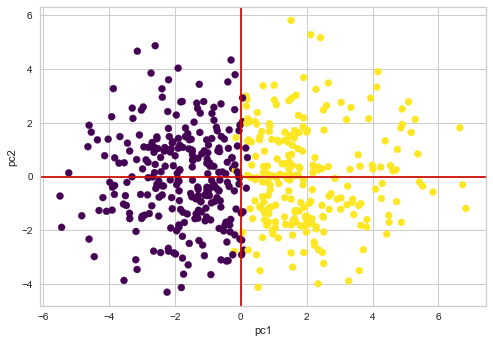

In [362]:
plt.scatter(x=pc1, y=pc2, c=kmean.predict(interests_df), cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.axhline(c='r')
plt.axvline(c='r')

In [363]:
analysis = pd.DataFrame([pca.components_[0], pca.components_[1], interests_df.columns]).T
analysis.columns = ['pc1', 'pc2', 'labels']
analysis.sort_values('pc2')

,pc1,pc2,labels
20,0.135017,-0.409516,Pets
18,0.121731,-0.184241,Shopping
13,0.217265,-0.12525,"Countryside, outdoors"
6,0.265633,-0.103892,Medicine
14,0.367368,-0.103533,Dancing
17,0.233529,-0.102953,Gardening
16,0.334795,-0.046431,Writing
15,0.393638,-0.0402423,Musical instruments
11,0.36347,-0.0250145,Art exhibitions
19,0.0436441,-0.0119121,Fun with friends


# Evaluating Clustering

## Elbow method

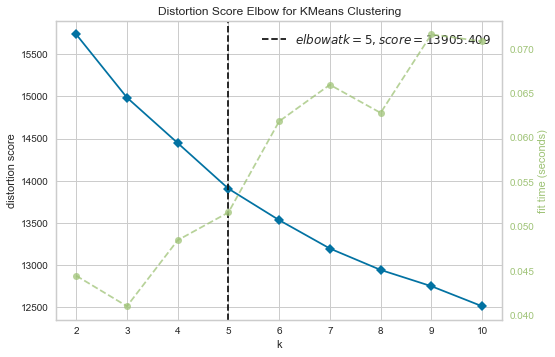

In [364]:
KElbowVisualizer(KMeans()).fit(interests_df).show()

## Silhouette method

In [253]:
from yellowbrick.cluster import SilhouetteVisualizer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x128b963a0>,
                     colors=None, is_fitted='auto', model=None)

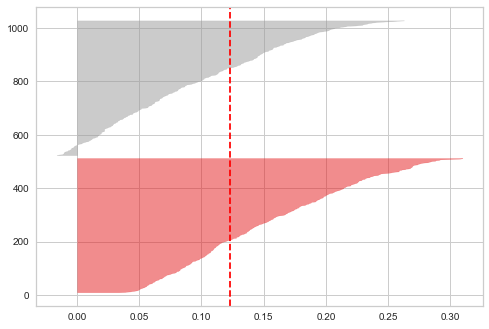

In [103]:
SilhouetteVisualizer(KMeans(n_clusters=2)).fit(emotional)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12d8d6820>,
                     colors=None, is_fitted='auto', model=None)

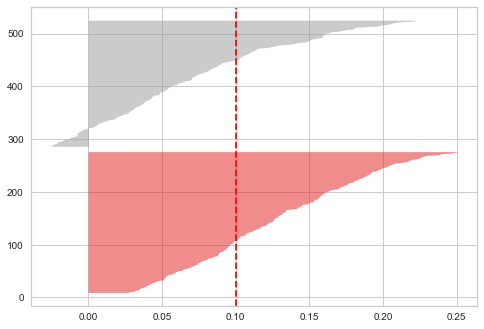

In [365]:
# Interests
SilhouetteVisualizer(KMeans(n_clusters=2)).fit(interests_df)

In [333]:
# COMPARING BOTH METHODS, the conclusion is that 3 clusters are a good number.

## Hierarchical

In [334]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [335]:
# Emotions:

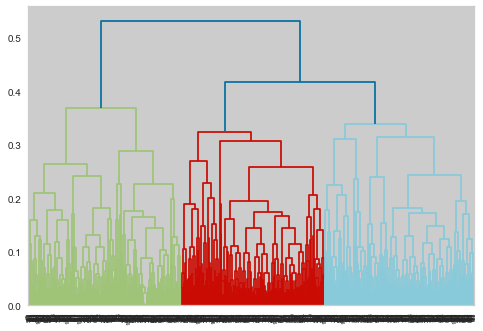

In [336]:
dendrogram(linkage(emotional, metric='cosine', method='complete'));

# Analyzing Cluster 

In [367]:
kmean.predict(interests_df)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,

In [368]:
interests_df['cluster'] = kmean.predict(interests_df)

In [379]:
int_clust = interests_df.groupby('cluster').mean().T

In [387]:
int_clust[0] > int_clust[1] 

Psychology                False
Politics                  False
Mathematics               False
Economy Management         True
Geography                 False
Foreign languages         False
Medicine                  False
Science and technology    False
Finances                  False
Internet                   True
Cars                       True
Art exhibitions           False
Religion                  False
Countryside, outdoors     False
Dancing                   False
Musical instruments       False
Writing                   False
Gardening                 False
Shopping                  False
Fun with friends          False
Pets                      False
dtype: bool

In [389]:
int_clust.sort_values(0, ascending=False)

cluster,0,1
Fun with friends,4.434944,4.552743
Internet,4.219331,4.126582
Foreign languages,3.453532,4.164557
"Countryside, outdoors",3.271375,4.080169
Shopping,3.245353,3.561181
Pets,3.226766,3.464135
Finances,2.892193,3.198312
Science and technology,2.869888,3.329114
Psychology,2.780669,3.654008
Geography,2.654275,3.350211


In [371]:
pca = PCA(2)

In [372]:
pca.fit(interests_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [373]:
pca.explained_variance_ratio_.sum()

0.2514842635536715

In [374]:
from yellowbrick.features.pca import PCADecomposition

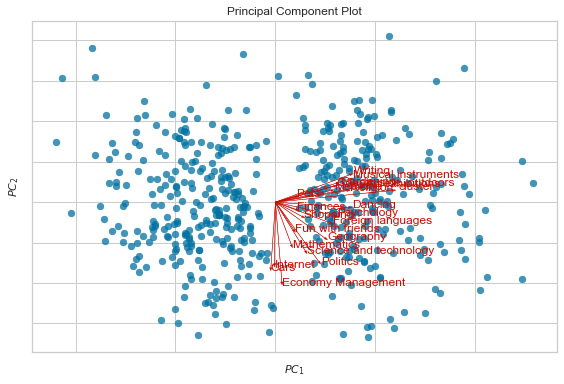

In [375]:
visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(pd.DataFrame(interests_df, columns=interests_df.columns))
visualizer.show()